In [1]:
import pandas as pd
import scipy.stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from statistics import correlation
from scipy.stats import kstest, spearmanr

In [2]:
df = pd.read_excel(r'D:\Iris1.xlsx')
df = df.drop(columns=['order', 'type', 'petalwid'])

sepalwid = df['sepalwid']

In [3]:
df

,sepallen,sepalwid,petallen
0,7.0,3.2,4.7
1,6.4,3.2,4.5
2,6.9,3.1,4.9
3,5.5,2.3,4.0
4,6.5,2.8,4.6
5,5.7,2.8,4.5
6,6.3,3.3,4.7
7,4.9,2.4,3.3
8,6.6,2.9,4.6
9,5.2,2.7,3.9


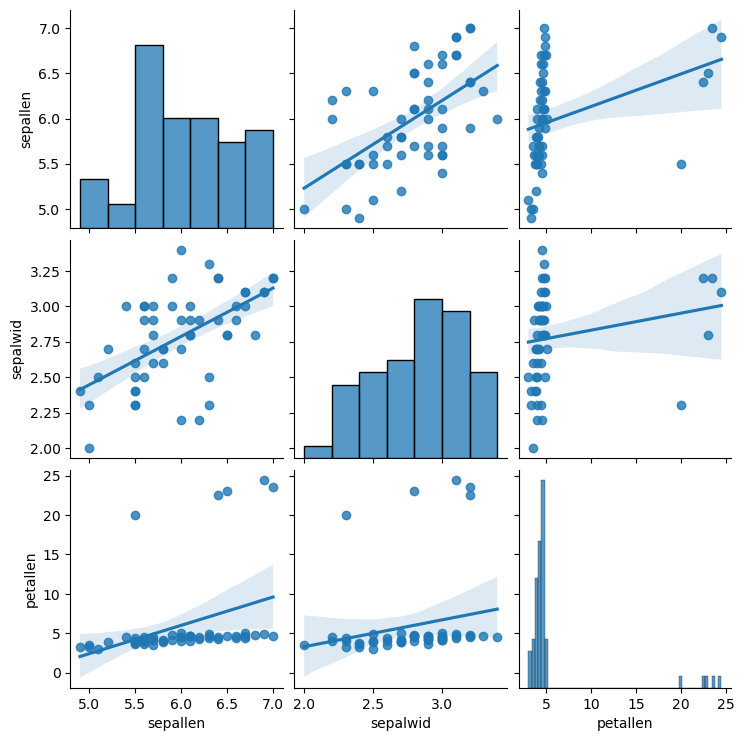

In [4]:
sns.pairplot(df, kind='reg')

plt.show()

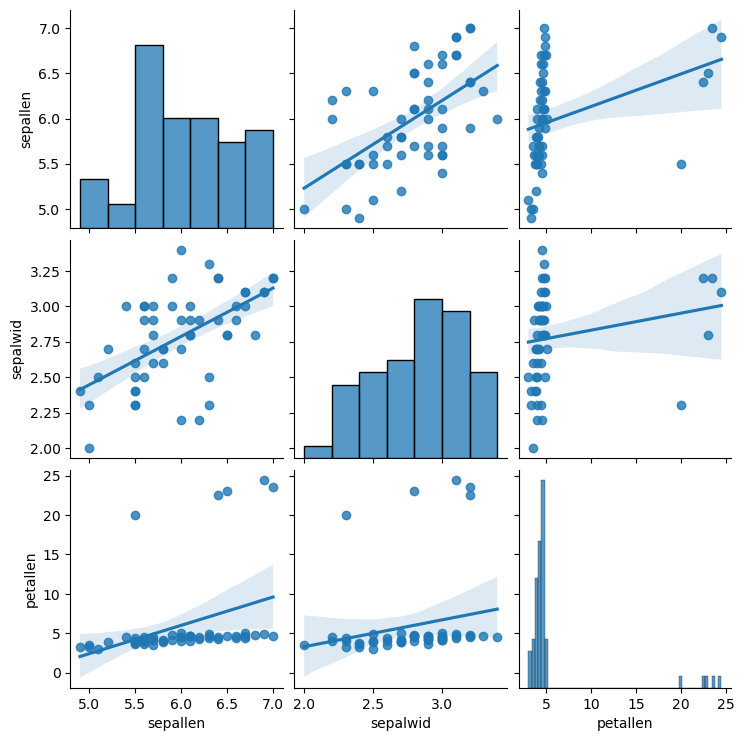

In [4]:
sns.pairplot(df, kind='reg')

plt.show()

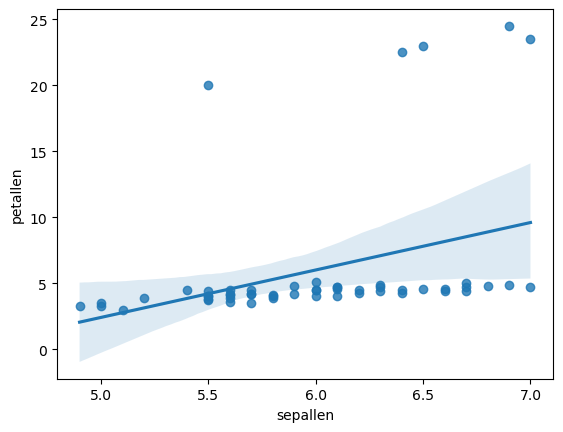

In [5]:
sns.regplot(x = df['sepallen'], y = df['petallen'])

plt.show()

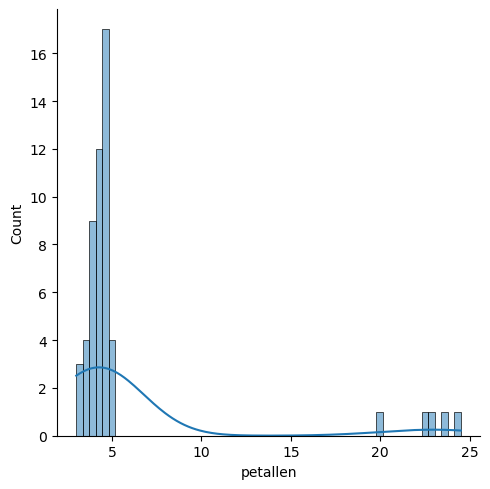

In [6]:
sns.displot(df['petallen'], kde=True)

plt.show()

In [17]:
print(scipy.stats.shapiro(df['petallen']))
print(scipy.stats.chisquare(df['petallen']))

ShapiroResult(statistic=0.41602712869644165, pvalue=2.460781415875718e-13)
Power_divergenceResult(statistic=262.0093052109182, pvalue=1.964323091022416e-29)


In [7]:
df['sepallen'].corr(df['petallen'])

0.3593282969000505

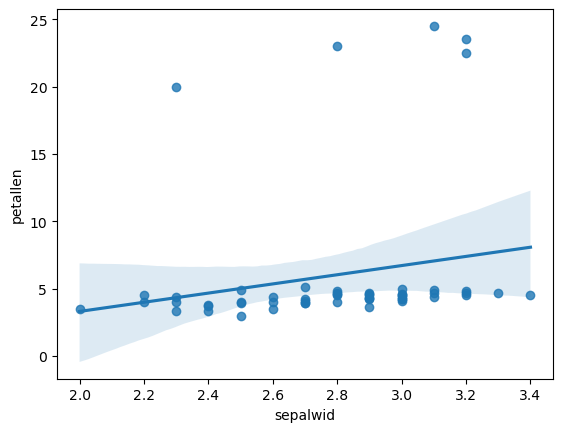

In [8]:
sns.regplot(x = df['sepalwid'], y = df['petallen'])

plt.show()

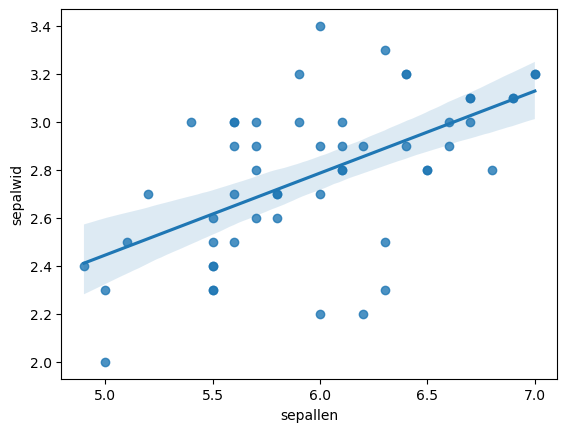

In [9]:
sns.regplot(x = df['sepallen'], y = df['sepalwid'])

plt.show()

In [10]:
rho, p = spearmanr(df['sepallen'], df['petallen'])

print('Spearman correlation coefficient:', rho)
print('Spearman P-value:', p)

Spearman correlation coefficient: 0.713911075732791
Spearman P-value: 1.3598701137791827e-09


In [11]:
#Начало регерссионного анализа
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepallen,sepalwid,petallen
sepallen,1.000000,0.575099,0.359328
sepalwid,0.575099,1.000000,0.202228
petallen,0.359328,0.202228,1.000000


In [12]:
import statsmodels.api as sm

x, y = df[['sepalwid', 'petallen']], df['sepallen']
x = sm.add_constant (x)

model = sm. OLS (y, x). fit ()
print(model. summary ())

                            OLS Regression Results                            
Dep. Variable:               sepallen   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     16.46
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           3.05e-06
Time:                        18:02:32   Log-Likelihood:                -29.705
No. Observations:                  54   AIC:                             65.41
Df Residuals:                      51   BIC:                             71.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3828      0.516      6.551      0.0

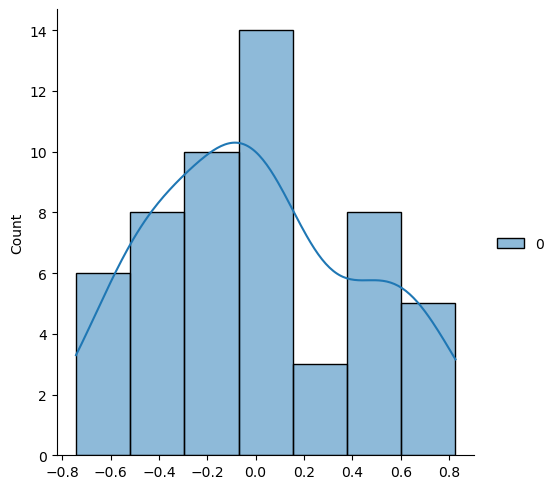

In [13]:
raw_residuals = model.resid

sns.displot(pd.DataFrame(raw_residuals), kde=True)
plt.show()

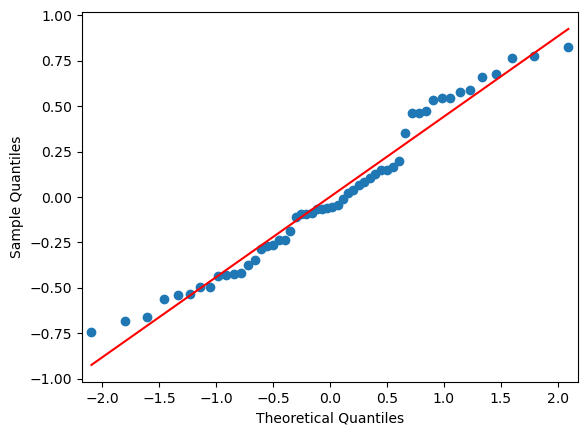

In [14]:
fig = sm.qqplot(raw_residuals, line='r')
plt.show()

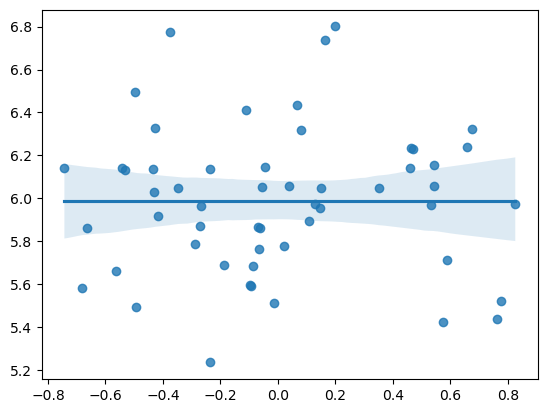

In [15]:
sns.regplot(x = raw_residuals, y = model.predict())

plt.show()

In [19]:
model = sm.formula.ols('sepallen ~ sepalwid + petallen', data=df).fit()
anovatable = sm.stats.anova_lm(model, typ=2)

print(anovatable)

raw_residuals = model.resid

            sum_sq    df          F    PR(>F)
sepalwid  4.114738   1.0  22.089482  0.000020
petallen  0.962711   1.0   5.168200  0.027246
Residual  9.500069  51.0        NaN       NaN
